<a href="https://colab.research.google.com/github/Manish1176/Deep-Learning-Project/blob/main/DL_Project_4_CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
# daatset api
!kaggle competitions download -c cifar-10

 96% 689M/715M [00:13<00:00, 112MB/s] 
100% 715M/715M [00:13<00:00, 55.3MB/s]


In [19]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [20]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [21]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [22]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.9 MB/s eta 0:00:00


In [23]:
# extracting the compessed train Dataset
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [24]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing Dependencies

In [25]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [26]:
filenames = os.listdir('/content/train')

In [27]:
type(filenames)

list

In [15]:
len(filenames)

50000

In [16]:
print(filenames[0:5])
print(filenames[-5:])

['3848.png', '39301.png', '17294.png', '48454.png', '28717.png']
['42207.png', '845.png', '16471.png', '44133.png', '38807.png']


**Labels Processings**

In [28]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [29]:
labels_df.shape

(50000, 2)

In [19]:
labels_df.head(2)

,id,label
0,1,frog
1,2,truck


In [21]:
labels_df[labels_df['id'] == 3848]

,id,label
3847,3848,bird


In [22]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [30]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [24]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [31]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [labels_dictionary[i] for i in labels_df['label']]

In [27]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


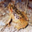

In [32]:
# displaying sample image-->too small image of 32*32 pixel
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

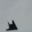

In [29]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/49995.png')
cv2_imshow(img)

In [30]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [33]:
id_list = list(labels_df['id'])

In [32]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [34]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [34]:
type(data)

list

In [35]:
len(data)

50000

In [36]:
type(data[0])

numpy.ndarray

In [37]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
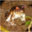

In [38]:
data[0]

In [35]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [40]:
type(X)

numpy.ndarray

In [41]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
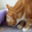

In [39]:
X_train[0]

**Building Nueral Network**

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [42]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9500 - acc: 0.3014 - val_loss: 1.8131 - val_acc: 0.3413
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7944 - acc: 0.3608 - val_loss: 1.7211 - val_acc: 0.3823
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7390 - acc: 0.3804 - val_loss: 1.6907 - val_acc: 0.3930
Epoch 4/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7078 - acc: 0.3905 - val_loss: 1.7028 - val_acc: 0.3840
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6750 - acc: 0.4020 - val_loss: 1.6720 - val_acc: 0.3988
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6527 - acc: 0.4135 - val_loss: 1.6746 - val_acc: 0.4038
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6330 - acc: 0.4178 - val_loss: 1.6618 - val_acc: 0.3972
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

**ResNet50**

In [44]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [45]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [46]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [47]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [48]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 476s 394ms/step - loss: 2.0120 - acc: 0.2767 - val_loss: 1.7123 - val_acc: 0.3735
Epoch 2/10
1125/1125 [==============================] - 437s 389ms/step - loss: 1.4027 - acc: 0.4998 - val_loss: 1.2054 - val_acc: 0.5885
Epoch 3/10
1125/1125 [==============================] - 444s 395ms/step - loss: 1.1757 - acc: 0.5959 - val_loss: 1.0323 - val_acc: 0.6430
Epoch 4/10
1125/1125 [==============================] - 437s 389ms/step - loss: 1.0347 - acc: 0.6491 - val_loss: 1.0014 - val_acc: 0.6365
Epoch 5/10
1125/1125 [==============================] - 444s 395ms/step - loss: 0.9363 - acc: 0.6847 - val_loss: 0.8347 - val_acc: 0.7078
Epoch 6/10
1125/1125 [==============================] - 444s 395ms/step - loss: 0.8502 - acc: 0.7170 - val_loss: 0.7663 - val_acc: 0.7295
Epoch 7/10
1125/1125 [==============================] - 437s 389ms/step - loss: 0.7840 - acc: 0.7380 - val_loss: 0.7048 - val_acc: 0.7660
Epoch 8/10
1125/1125 [============

In [49]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 116ms/step - loss: 0.7874 - acc: 0.7593
Test Accuracy = 0.7592999935150146


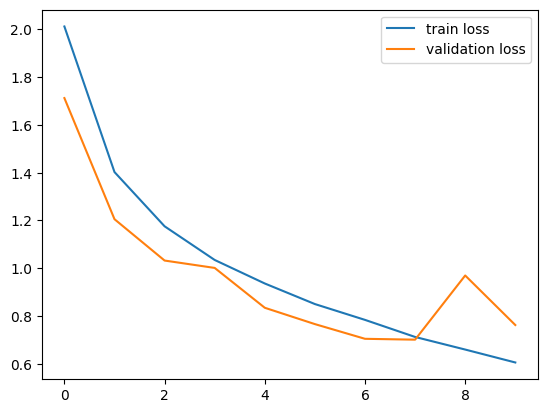

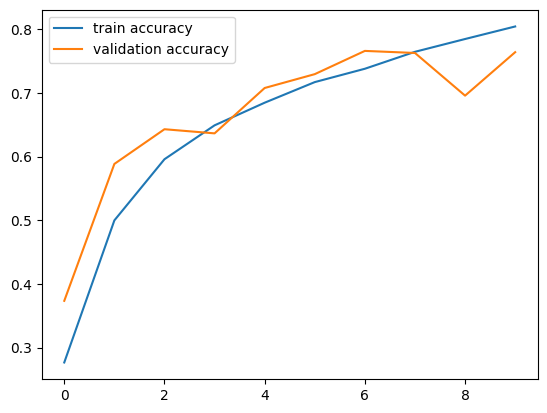

In [50]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()